In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import linear_model

### f(x) = $0.5m * |A.x -b|^2$ 

In [2]:
def cost(x):
    m = X_train.shape[0]
    return 0.5/m * np.linalg.norm(X_train.dot(x) - y_train, 2)**2

### f'(x) = $1/m*A^T*(A.x - b)$

In [3]:
def grad(x):
    m = X_train.shape[0]
    return 1/m * X_train.T.dot(X_train.dot(x) - y_train)

#### Công thức Kiểm tra đạo hàm

In [4]:
def check_grad(x):
    eps = 1e-4
    g = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy()
        x2 = x.copy()
        x1[i] += eps
        x2[i] -= eps
        g[i] = (cost(x1) - cost(x2))/(2*eps)

    g_grad = grad(x)
    if np.linalg.norm(g-g_grad) > 1e-5:
        print("WARNING: CHECK GRADIENT FUNCTION!")

In [5]:
def gradient_decsent(x_init, learning_rate, iteration):
    x_list = [x_init]
    for i in range(iteration):
        x_new = x_list[-1] - learning_rate*grad(x_list[-1])
#         if np.linalg.norm(grad(x_new))/(len(x_new)) < 1: # Cách 1: để dừng thuật toán (khi grad đủ nhỏ => thuật toán chạm điểm cực trị)
#             break
        
        x_list.append(x_new)
    return x_list

### model = $A^T*b*(A*A^T)^(-1)$ 

1001


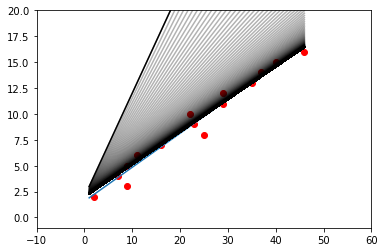

In [6]:
# Data
X_train = np.array([[2,9,7,9,11,16,25,23,22,29,29,35,37,40,46]]).T
y_train = np.array([[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]).T

# Draw data
plt.plot(X_train, y_train, "ro")
plt.axis([-10, 60, -1, 20]);

# Create Linear Regression model
# Add one to X_train
ones = np.ones((X_train.shape[0], 1), dtype=np.int8)
X_train = np.concatenate((X_train, ones), axis=1)

# apply the linear regression transform formula: model = X^T.y.(X.X^T)^(-1)
model = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose().dot(y_train))


x0_gd = np.linspace(1, 46, 2)
y0_model = model[0][0]*x0_gd + model[1][0]
# Draw Line created by linear regression formular
plt.plot(x0_gd, y0_model);

# Random initial line
x_init = np.array([[1.], [2.]])
y0_init = x_init[0][0]*x0_gd + x_init[1][0]
plt.plot(x0_gd, y0_init, color="black");

check_grad(x_init)

# Run gradient descent
iteration = 1000
learning_rate = 0.0001

x_list = gradient_decsent(x_init, learning_rate, iteration)
for i in range(len(x_list)):
    y0_gd = x_list[i][0][0]*x0_gd + x_list[i][1][0]
    plt.plot(x0_gd, y0_gd, color="black", alpha = 0.3);
    
print(len(x_list))

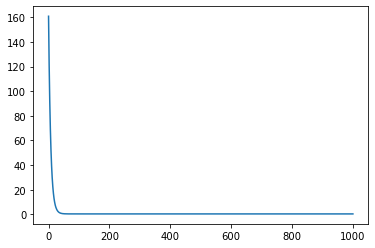

In [7]:
# biểu đồ để xác định khi nào dừng thuật toán (tìm iteration phù hợp)
cost_list = []
iter_list = []

for i in range(len(x_list)):
    iter_list.append(i)
    cost_list.append(cost(x_list[i]))
    
plt.plot(iter_list, cost_list);